In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

In [3]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

os.environ["OPENAI_API_KEY"] = os.getenv("QWEN_API_KEY")

llm = ChatOpenAI(
    openai_api_base="http://localhost:8080",
    model = "qwen2.5-7b",
    temperature=0.1,
    extra_body={
        "metadata": {
            "generation_name": "titus-generation-langchain-client",
            "generation_id": "langchain-client-gen-id1",
            "trace_id": "langchain-client-trace-id1",
            "trace_user_id": "langchain-client-user-id1"
        }
    }
)

In [4]:
messages = [
    SystemMessage(
        content="You are a helpful assistant."
    ),
    HumanMessage(
        content="Why is the sky blue?"
    ),
]
response = llm.invoke(messages)

In [5]:
from IPython.display import display, Markdown

display(Markdown(response.content))

The sky appears blue because of a phenomenon called Rayleigh scattering. When sunlight enters the Earth's atmosphere, it collides with molecules and small particles in the air. Sunlight is made up of different colors, each of which has a different wavelength. Blue light waves are shorter and scatter more easily than other colors like red or yellow, which have longer wavelengths.

The blue light gets scattered in all directions by the gases and particles in the atmosphere, making the sky appear blue when viewed from the ground. This is why the sky looks particularly bright blue on clear days with little air pollution to block the view. At sunrise and sunset, you might see reds and oranges because these longer wavelengths of light are less affected by the scattering process and can travel in a straighter line through more of the atmosphere before reaching your eyes.

## ReAct

### Normal ReAct agent

In [6]:
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent

def get_weather(city: str) -> str:  
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

agent = create_react_agent(
    model = llm,
    tools=[get_weather],
    prompt="""You are a helpful assistant. When using tools:
    Call the appropriate tool to get information,
    Once you have the information, provide a clear response to the user,
    Do not call the same tool multiple times unnecessarily,
    Always end with a final answer to the user's question"""
)

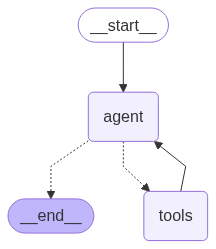

In [7]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [8]:
response = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is the weather in Singapore?"
            }
        ]
    },
    debug=True
)

[values] {'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='7cc47d7d-6b6d-437d-85f7-bfe61d1da133')]}
[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_07d0eb32-57d0-4cc1-bae4-92c0c1a0d6fe', 'function': {'arguments': '{"city": "Singapore"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 190, 'total_tokens': 207, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'ollama/qwen2.5', 'system_fingerprint': None, 'id': 'chatcmpl-e021ef23-48e0-4931-af0b-74e73f95bf79', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6af35df1-6dc4-4e5b-b89b-16aee8969d54-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Singapore'}, 'id': 'call_07d0eb32-57d0-4cc1-bae4-92c0c1a0d6fe', 'type': 'tool_call'}], usage_metadata={'input_to

KeyboardInterrupt: 

### Set with `return_direct`

In [ ]:
@tool(return_direct=True)
def get_weather(city: str) -> str:  
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

agent = create_react_agent(
    model = llm,
    tools=[get_weather],
    prompt="You are a helpful assistant"
)

In [14]:
response = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is the weather in Singapore?"
            }
        ]
    },
    debug=True
)

[values] {'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='33598984-d5e4-4b76-8d39-96fe452bd1e9')]}
[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ebf718d9-c912-41b8-be56-a6b50b872dbc', 'function': {'arguments': '{"city": "Singapore"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 138, 'total_tokens': 155, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'ollama/qwen2.5', 'system_fingerprint': None, 'id': 'chatcmpl-daa90350-1b48-43df-92c6-af426bba874d', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--602e9e7d-7a5f-450a-82d7-8d87058ddd73-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Singapore'}, 'id': 'call_ebf718d9-c912-41b8-be56-a6b50b872dbc', 'type': 'tool_call'}], usage_metadata={'input_to

In [15]:
response

{'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='33598984-d5e4-4b76-8d39-96fe452bd1e9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ebf718d9-c912-41b8-be56-a6b50b872dbc', 'function': {'arguments': '{"city": "Singapore"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 138, 'total_tokens': 155, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'ollama/qwen2.5', 'system_fingerprint': None, 'id': 'chatcmpl-daa90350-1b48-43df-92c6-af426bba874d', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--602e9e7d-7a5f-450a-82d7-8d87058ddd73-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Singapore'}, 'id': 'call_ebf718d9-c912-41b8-be56-a6b50b872dbc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 138, 'output_tokens': 17, 'total_to

### Using LangChain Ollama

In [16]:
@tool(return_direct=True)
def get_weather(city: str) -> str:  
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

In [10]:
from langchain_ollama import ChatOllama

llm2 = ChatOllama(
    model="llama3.1",
    temperature=0,
    # other params...
)
agent2 = create_react_agent(
    model = llm2,
    tools=[get_weather],
    prompt="You are a helpful assistant"
)
response = agent2.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is the weather in Singapore?"
            }
        ]
    },
    debug=True
)

[values] {'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='e91fbaa3-55d4-4025-b199-eeb488de670e')]}
[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.1', 'created_at': '2025-07-07T15:18:12.899137Z', 'done': True, 'done_reason': 'stop', 'total_duration': 638185292, 'load_duration': 28646917, 'prompt_eval_count': 156, 'prompt_eval_duration': 359401916, 'eval_count': 17, 'eval_duration': 249406667, 'model_name': 'llama3.1'}, id='run--b37b6462-1a90-49b9-854c-4bd644be7b2d-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Singapore'}, 'id': '5b90e77a-4b45-43e2-be29-72f93a2158e2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 156, 'output_tokens': 17, 'total_tokens': 173})]}}
[values] {'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='e91fbaa3-55d4-4025-b199-eeb488de670e'), AI

In [13]:
display(Markdown(response['messages'][-1].content))

Based on the tool call response, I can provide a more accurate answer:

The current weather in Singapore is mostly sunny with a high chance of sunshine throughout the day. The temperature is expected to be around 32°C (90°F) with a gentle breeze. It's a great time to enjoy outdoor activities and explore the city!

In [19]:
llm_with_tools=llm.bind_tools([get_weather])
result = llm_with_tools.invoke("What is the weather in Singapore?")

In [ ]:
result.tool_calls

[{'name': 'get_weather',
  'args': {'city': 'Singapore'},
  'id': 'call_825b952f-8965-41d7-ade2-b8554cd34dbf',
  'type': 'tool_call'}]

### Using LlamaIndex

In [2]:
from llama_index.llms.azure_openai import AzureOpenAI

llm = AzureOpenAI(
    engine="qwen2.5-7b",               # model_name on litellm proxy
    temperature=0.0,
    azure_endpoint="http://localhost:8080", # litellm proxy endpoint
    api_key="sk-1234",                    # litellm proxy API Key
    api_version="2025-04-01-preview",
)

In [4]:
response = llm.complete("Hi!")
display(Markdown(str(response)))

Hello! How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific.

In [5]:
from llama_index.core.agent.workflow import FunctionAgent
from llama_index.core.tools import FunctionTool

def add(a: int | float, b: int|float) -> int|float:
    """Use this tool to add 2 integers or floats"""
    return a + b

agent = FunctionAgent(
    llm=llm,
    tools=[FunctionTool.from_defaults(add)]
)

In [6]:
import nest_asyncio
nest_asyncio.apply()

response = await agent.run("What is 76+12?")

In [8]:
str(response)

'{"name": "add", "arguments":{"a": 76, "b": 12}}'